In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/test_opencv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

Mounted at /content/drive


['img_40.jpg',
 'img_20.jpg',
 'img_60.jpg',
 'img_100.jpg',
 'img_80.jpg',
 'img_120.jpg',
 'img_140.jpg',
 'img_160.jpg',
 'img_180.jpg',
 'img_200.jpg',
 'img_220.jpg',
 'img_240.jpg',
 'img_260.jpg',
 'models']

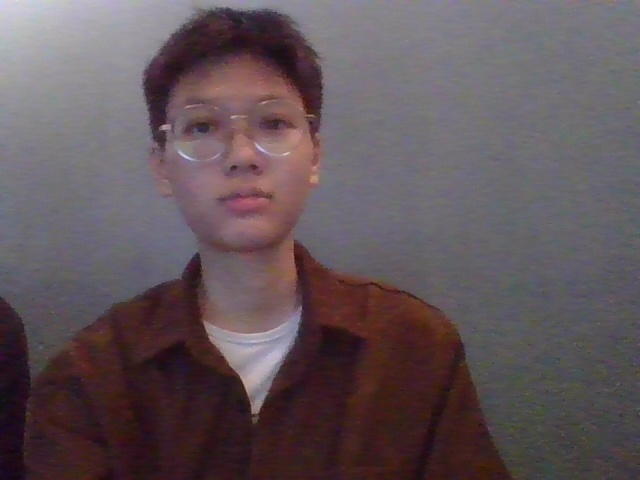

In [2]:
# Hien thi mot anh
img = cv2.imread(path + "/img_220.jpg")
cv2_imshow(img)

In [3]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path+  "/img_220.jpg"

/content/drive/MyDrive/test_opencv/models/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/test_opencv/models/dlib_face_recognition_resnet_model_v1.dat


-0.122827
0.0227018
0.0767964
-0.0573332
-0.0715234
-0.0505766
-0.0783264
-0.162568
0.147024
-0.160012
0.234546
-0.0715255
-0.204988
-0.114266
-0.0735587
0.205996
-0.143779
-0.121944
-0.0440974
-0.0455881
0.00264507
-0.0095887
0.0430411
0.0274162
-0.137239
-0.363211
-0.0955665
-0.0994006
-0.0276818
-0.0978034
-0.0382525
0.0756779
-0.178463
-0.023239
-0.000945635
0.164466
-0.0155811
-0.0469316
0.140193
-0.0412419
-0.224702
-0.0241548
0.0135102
0.203556
0.179016
0.0143529
-0.00499634
-0.168073
0.114311
-0.17525
0.0525525
0.0654149
0.00901026
0.0595348
-0.0243152
-0.085233
0.0320934
0.154255
-0.150052
0.00547347
0.050847
-0.143274
-0.077048
-0.0323836
0.193667
0.122596
-0.116362
-0.130844
0.136963
-0.198482
-0.0295323
0.0444922
-0.0979617
-0.183582
-0.326323
0.00332236
0.362424
0.0806836
-0.194446
0.00322777
-0.00287325
-0.008484
0.146076
0.190695
-0.00883908
0.015791
-0.0582764
0.00896147
0.219884
-0.055884
0.00509166
0.23675
-0.0314882
0.0946939
0.0354638
0.0482312
-0.0587164
0.0219948


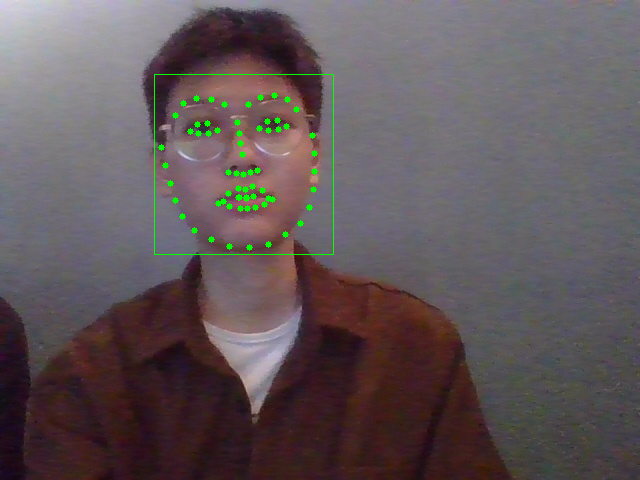

In [4]:
# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)